# What is Segmentation??

Image segmentation is a critical process in computer vision. It involves dividing a visual input into segments to simplify image analysis. Segments represent objects or parts of objects, and comprise sets of pixels, or “super-pixels”. Image segmentation sorts pixels into larger components, eliminating the need to consider individual pixels as units of observation. There are three levels of image analysis:

Classification – categorizing the entire image into a class such as “people”, “animals”, “outdoors”

Object detection – detecting objects within an image and drawing a rectangle around them, for example, a person or a sheep.

Segmentation – identifying parts of the image and understanding what object they belong to. Segmentation lays the basis for performing object detection and classification.








- Image Segmentation Applications:
Image segmentation helps determine the relations between objects, as well as the context of objects in an image. Applications include face recognition, number plate identification, and satellite image analysis. Industries like retail and fashion use image segmentation, for example, in image-based searches. Autonomous vehicles use it to understand their surroundings.

 - Object Detection and Face Detection:
These applications involve identifying object instances of a specific class in a digital image. Semantic objects can be classified into classes like human faces, cars, buildings, or cats.

Face detection—a type of object-class detection with many applications, including biometrics and autofocus features in digital cameras. Algorithms detect and verify the presence of facial features. For example, eyes appear as valleys in a gray-level image.
Medical imaging—extracts clinically relevant information from medical images. For example, radiologists may use machine learning to augment analysis, by segmenting an image into different organs, tissue types, or disease symptoms. This can reduce the time it takes to run diagnostic tests.
Machine vision—applications that capture and process images to provide operational guidance to devices. This includes both industrial and non-industrial applications. Machine vision systems use digital sensors in specialized cameras that allow computer hardware and software to measure, process, and analyze images. For example, an inspection system photographs soda bottles and then analyzes the images according to pass-fail criteria to determine if the bottles are properly filled.

what is image segmentation?
Semantic Segmentation vs. Instance Segmentation
Within the segmentation process itself, there are two levels of granularity:

Semantic segmentation—classifies all the pixels of an image into meaningful classes of objects. These classes are “semantically interpretable” and correspond to real-world categories. For instance, you could isolate all the pixels associated with a cat and color them green. This is also known as dense prediction because it predicts the meaning of each pixel.
semantic segmentation

Instance segmentation—identifies each instance of each object in an image. It differs from semantic segmentation in that it doesn’t categorize every pixel. If there are three cars in an image, semantic segmentation classifies all the cars as one instance, while instance segmentation identifies each individual car.


In [4]:
x=plt.imread('../input/images-for-clustering/gettyimages-982123216.jpg')
plt.figure(figsize=(18,8))
plt.imshow(x)
plt.axis("off")
plt.show()

NameError: name 'plt' is not defined

Let’s understand image segmentation using a simple example. Consider the  above .
We can predict whether the image has dog or horse but can we tell the location of the dog in the image just by using the model . No we can't that's where the image segmentation comes in :)
This is a simple introductory file explaining 2 types of Image segmentation :
* Region Based Segmentation 
* Edge Based Segmentation
* Clustering Based Segmentation

# Importing the packages

In [6]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from PIL import Image
from sklearn.cluster import KMeans
from skimage.filters import sobel
import skimage
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'skimage'

# Importing the images

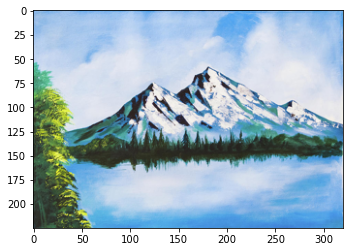

In [216]:
image=Image.open('../input/images-for-clustering/the-snow-mountain-radhakrishnan-v-k.jpg')
image=image.resize((320,225))
image=np.array(image)
plt.imshow(image)

# Dark side of the image ??

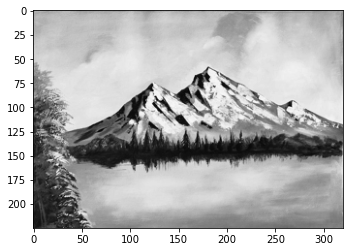

In [217]:
# Making the gray scale of the image
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

# Region based Segmentation of the image (2 Folds )

Separates the objects into different regions based on some threshold value(s).

In [218]:
# What if we use the mean of the pixels in the whole image as threshold and kinda use it for segmentation
arr=gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean() :
        arr[i]=1
    else:
        arr[i]=0
gray_segmented=arr.reshape(gray.shape[0],gray.shape[1])

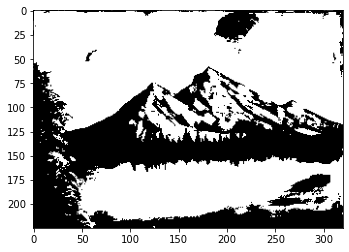

In [219]:
plt.imshow(gray_segmented,cmap='gray')

# Region based Segmentaion of the image (5 Folds)

In [220]:
# What if we tune the above function more??
arr=gray.flatten()
for i in range(len(arr)):
    if arr[i]>=arr.mean():
        arr[i]=4
    elif arr[i]>=0.75:
        arr[i]=3
    elif arr[i]>0.5 :
        arr[i]=2
    elif arr[i]>0.25:
        arr[i]=1
    else:
        arr[i]=0
gray_segmented_2=arr.reshape(gray.shape[0],gray.shape[1])
    

In [221]:
# There are 5 segments in the below image :)
plt.figure(figsize=(18,8))
plt.imshow(gray_segmented_2,cmap='pink')
plt.axis("off")
plt.show()

# Another way to do Region Based Segmentation

We therefore try a region-based method using the watershed transform. First, we find an elevation map using the Sobel gradient of the image.

The Sobel operator performs a 2-D spatial gradient measurement on an image and so emphasizes regions of high spatial frequency that correspond to edges. Typically it is used to find the approximate absolute gradient magnitude at each point in an input grayscale image.

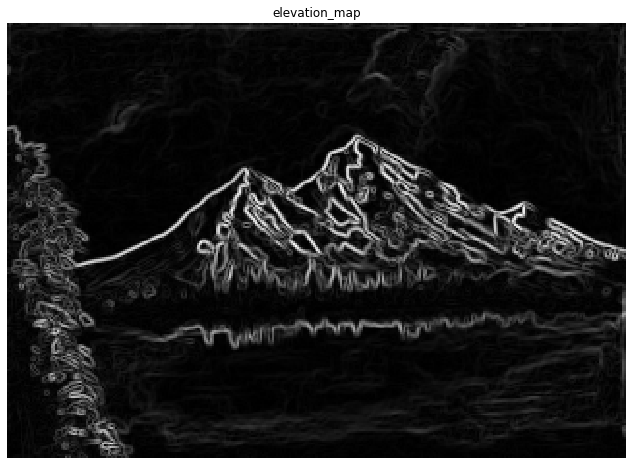

In [247]:
imm=image[:,:,0]
elevation_map = sobel(imm)

fig, ax = plt.subplots(figsize=(18,8))
ax.imshow(elevation_map, cmap='gray', interpolation='nearest')
ax.axis('off')
ax.set_title('elevation_map')
plt.show()

## Getting the extreme parts of the image using histogram

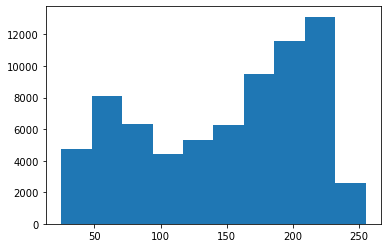

In [248]:
plt.hist(imm.flatten())
plt.show()

Text(0.5, 1.0, 'markers')

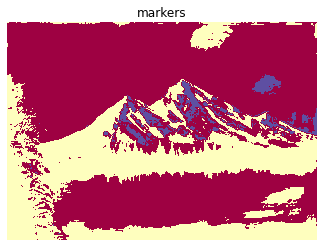

In [249]:
markers = np.zeros_like(imm)
markers[imm < 117] = 1
markers[imm > 232] = 2

fig, ax = plt.subplots(figsize=(8,4))
ax.imshow(markers, cmap='Spectral', interpolation='nearest')
ax.axis('off')
ax.set_title('markers')


## Filling the extreme parts of the image

Text(0.5, 1.0, 'segmentation')

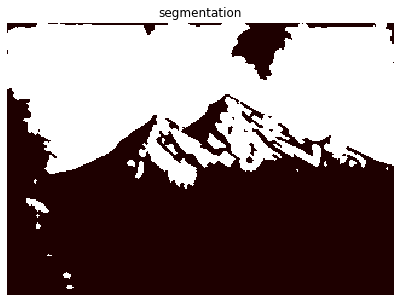

In [250]:
segmentation = skimage.segmentation.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(10,5))
ax.imshow(segmentation, cmap='pink',interpolation='nearest')
ax.axis('off')
ax.set_title('segmentation')

## Segmentation and labelling together

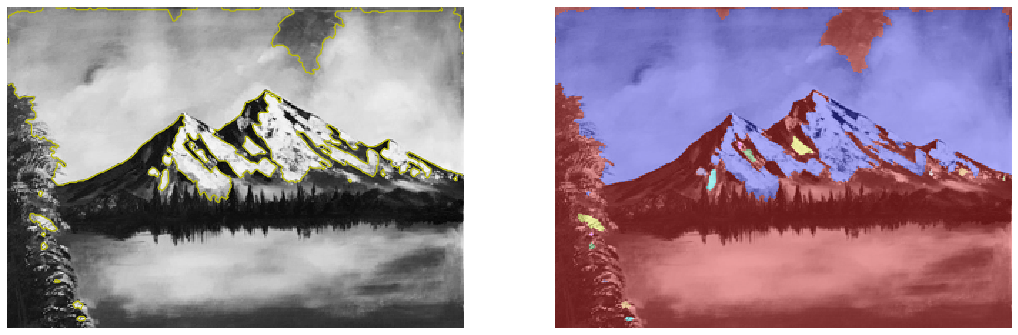

In [251]:
from skimage.color import label2rgb

segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_mountains, _ = ndi.label(segmentation)
image_label_overlay = label2rgb(labeled_mountains, image=imm)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)
ax1.imshow(imm, cmap=plt.cm.gray, interpolation='nearest')
ax1.contour(segmentation, [0.5], linewidths=1.2, colors='y')
ax1.axis('off')
ax1.set_adjustable('box')
ax2.imshow(image_label_overlay, interpolation='nearest')
ax2.axis('off')
ax2.set_adjustable('box')



In this second image i hope you can see the segments in different colors getting labelled :)

# Trying it on a dog image :)

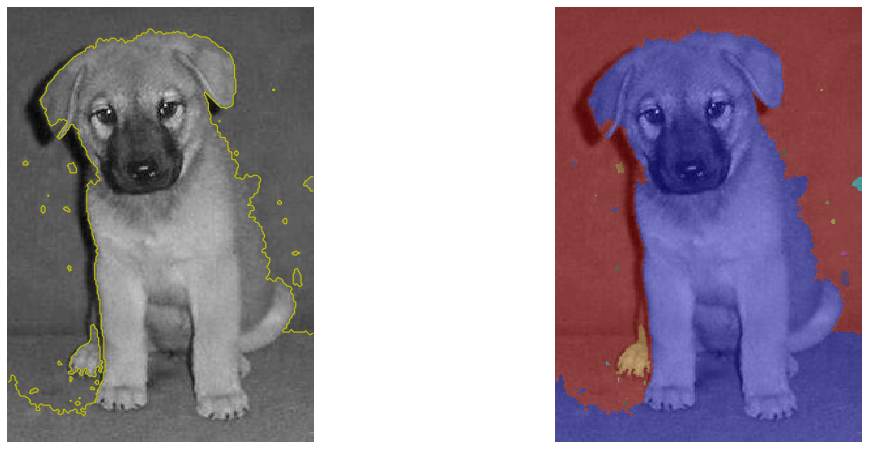

In [269]:
imm=Image.open('../input/cat-and-dog/training_set/training_set/dogs/dog.1004.jpg')

imm=np.array(imm)[:,:,0]
elevation_map = sobel(imm)
markers = np.zeros_like(imm)
markers[imm < 78.6] = 1
markers[imm > 103.8] = 2
segmentation = skimage.segmentation.watershed(elevation_map, markers)

segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_dog, _ = ndi.label(segmentation)
image_label_overlay = label2rgb(labeled_dog, image=imm)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharex=True, sharey=True)
ax1.imshow(imm, cmap=plt.cm.gray, interpolation='nearest')
ax1.contour(segmentation, [0.5], linewidths=1.2, colors='y')
ax1.axis('off')
ax1.set_adjustable('box')
ax2.imshow(image_label_overlay, interpolation='nearest')
ax2.axis('off')
ax2.set_adjustable('box')



# Awesome right :)

# Edge Detection of an image : Segmentation using Edges

Makes use of discontinuous local features of an image to detect edges and hence define a boundary of the object.

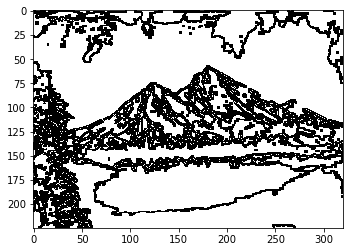

In [226]:
# we are gonna use kernel laplace here to discover the edges in the image :)
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])

out_l = ndimage.convolve(gray_segmented_2, kernel_laplace, mode='reflect')
arr=[]
for i in out_l.flatten():
    if i == 0:
        arr.append(0)
    else:
        arr.append(-100)
arr=np.array(arr)
arr=arr.reshape(out_l.shape[0],out_l.shape[1])
plt.imshow(arr,cmap='gray', interpolation='nearest')

# Segmentation Using Clustering

Divides the pixels of the image into homogeneous clusters.

![](https://d1m75rqqgidzqn.cloudfront.net/wp-data/2020/01/17162345/clustering-algorithms-in-Machine-Learning.jpg)

In [227]:
im=image/255
pic=im.reshape(im.shape[0]*im.shape[1],im.shape[2])

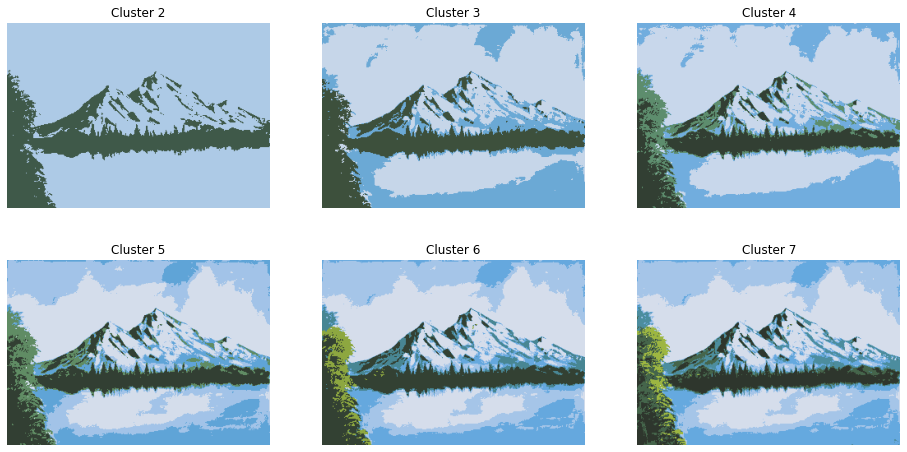

In [228]:
# Since we know 5 segments was looking great on the image we are gonna do 5 clusters here but you can try more too :)
fig, ax = plt.subplots(2, 3, figsize=(16, 8))
count=1
for i in range(2):
    for j in range(3):

        kmeans = KMeans(n_clusters=count+1, random_state=0).fit(pic)
        pic_print = kmeans.cluster_centers_[kmeans.labels_]
        clustered_pic=pic_print.reshape(im.shape[0],im.shape[1],im.shape[2])
        count+=1
        ax[i][j].set_title('Cluster '+str(count))
        ax[i][j].imshow(clustered_pic)
        ax[i][j].set_axis_off()
plt.show()

# Hoping you can see the difference in segmentation for different clusters :)